# Кластеризация

Реализовать алгоритмы кластеризации:
* KMeans(random)
* MiniBatchKMeans

Прототип класса:

In [107]:
from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

params = {'figure.subplot.left': 0.0,
          'figure.subplot.right': 1.0,
          'figure.subplot.bottom': 0.0,
          'figure.subplot.top': 1.0}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.gca(projection='3d')

image = mpimg.imread('./mailru.jpg')
data = image.reshape((image.shape[0] * image.shape[1], 3))

clusters = 64
d_min = np.min(data)
d_max = np.max(data)

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time

params = {'figure.subplot.left': 0.0,
          'figure.subplot.right': 1.0,
          'figure.subplot.bottom': 0.0,
          'figure.subplot.top': 1.0}

plt.rcParams.update(params)
fig = plt.figure()
# ax = fig.gca(projection='3d')

image = mpimg.imread('./mailru.jpg')
data = image.reshape((image.shape[0]*image.shape[1], 3))


class KMean:  # или MiniBatchKMeans
    def __init__(self, clusters):
        self.clusters = clusters

    def __init_mass_centers(self):
        self.d_depth = self.data.shape[1]
        return np.random.randint(self.data.min(), self.data.max(), [self.clusters, self.d_depth])

    def __init_list_of_objects(self):
        list_of_objects = list()
        for i in range(0, self.clusters):
            list_of_objects.append(list())
        return list_of_objects

    def __rclc_mass_centers(self, new_cnt):
        for string_n in range(len(self.cent_data)):
            if len(self.cent_data[string_n]) > 0:
                new_cen = np.zeros([1, self.d_depth])
                for elem_s in range(len(self.cent_data[string_n])):
                    new_cen = new_cen + self.data[self.cent_data[string_n][elem_s]]
                dif_cen = (new_cen / (len(self.cent_data[string_n]))).astype(int)
                if (self.cntrs[string_n] - dif_cen != np.zeros([1, self.d_depth])).all():
                    new_cnt += 1
                    self.cntrs[string_n] = dif_cen
        return new_cnt

    def fit(self, data_g):
        self.data = data_g
        self.cntrs = self.__init_mass_centers()

        new_cnt = 1
        while new_cnt > 0:
            t0 = time.time()
            new_cnt = 0
            self.cent_data = self.__init_list_of_objects()
            for dot in range(len(self.data)):
                clust_dist = np.sum(np.abs(self.cntrs - np.array([self.data[dot]] * 64)) ** 2, axis=-1) ** (1. / 2)
                min_ind = clust_dist.argmin()
                self.cent_data[min_ind].append(dot)
            # ax.scatter(self.cntrs.T[0], self.cntrs.T[1], self.cntrs.T[2])
            print(time.time() - t0)

            new_cnt = self.__rclc_mass_centers(new_cnt)

        new_data = np.zeros(self.data.shape)
        for row in range(len(self.cent_data)):
            print(row, self.cntrs[row], len(self.cent_data[row]))
            for item in range(len(self.cent_data[row])):
                new_data[self.cent_data[row][item]] = self.cntrs[row]

        # ax.scatter(self.cntrs.T[0], self.cntrs.T[1], self.cntrs.T[2], label="stop")
        # ax.set_zlim(self.data.min(), self.data.max())
        # plt.xlabel("X")
        # plt.ylabel("Y")
        # plt.legend()
        # plt.show()
        return new_data

    def predict(self, data_g):
        predict_cent_data = self.__init_list_of_objects()
        for dot in range(len(data_g)):
            clust_dist = np.sum(np.abs(self.cntrs - np.array([data_g[dot]] * 64)) ** 2, axis=-1) ** (1. / 2)
            min_ind = clust_dist.argmin()
            predict_cent_data[min_ind].append(dot)


var_s = 64
new_image = KMean(var_s).fit(data)
new_image = new_image.reshape((image.shape[0], image.shape[1], 3)).astype(np.uint8)
# new_image.reshape((image.shape[0], image.shape[1], 3))
plt.axis("off")
plt.imshow(new_image)
plt.show()


In [98]:
def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0, size):
        list_of_objects.append(list())
    return list_of_objects

d_depth = data.shape[1]
cntrs = np.random.randint(data.min(), data.max(), [clusters, d_depth])

new_cnt = 1
while new_cnt > 0:
    t1 = time.time()
    new_cnt = 0
    cent_data = init_list_of_objects(clusters)
    for dot in range(len(data)):
        clust_dist = np.sum(np.abs(cntrs - np.array([data[dot]] * 64)) ** 2, axis=-1) ** (1. / 2)
        min_ind = clust_dist.argmin()
        cent_data[min_ind].append(dot)
    # ax.scatter(cntrs.T[0], cntrs.T[1], cntrs.T[2])
    print(time.time() - t1)

    for string_n in range(len(cent_data)):
        if len(cent_data[string_n]) > 0:
            new_cen = np.zeros([1, d_depth])
            for elem_s in range(len(cent_data[string_n])):
                new_cen = new_cen + data[cent_data[string_n][elem_s]]
            dif_cen = (new_cen / (len(cent_data[string_n]))).astype(int)
            if (cntrs[string_n] - dif_cen != np.zeros([1, d_depth])).all():
                new_cnt += 1
                cntrs[string_n] = dif_cen

5.478881359100342
5.322190523147583
5.392370939254761
5.2810750007629395
5.284531593322754
5.304709196090698
5.278348207473755
5.251257419586182
5.300126075744629
5.2999958992004395
5.25924277305603
5.295369625091553
5.286761999130249
5.276061058044434
5.247843027114868
5.278778076171875
5.4105000495910645
5.306851625442505
5.304386377334595
5.303792238235474
5.265331983566284
5.318805694580078
5.293690204620361
5.311124324798584
5.294252872467041


In [130]:
t1 = time.time()
image_g = mpimg.imread('./x3nlgVYICyk.jpg')
data_g = image_g.reshape((image_g.shape[0] * image_g.shape[1], 3))

def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0, size):
        list_of_objects.append(list())
    return list_of_objects

predict_cent_data = init_list_of_objects(clusters)
print(time.time() - t1)
t1 = time.time()
for dot in range(len(data_g)):
    clust_dist = np.sum(np.abs(cntrs - np.array([data_g[dot]] * 64)) ** 2, axis=-1) ** (1. / 2)
    min_ind = clust_dist.argmin()
    predict_cent_data[min_ind].append(dot)
print(time.time() - t1)

new_data = np.zeros(data_g.shape)
for row in range(len(cent_data)):
    print(row, cntrs[row], len(cent_data[row]))
    for item in range(len(cent_data[row])):
        new_data[cent_data[row][item]] = cntrs[row]

0.02724599838256836
28.618730545043945
0 [34 44 13] 11523
1 [119  71  59] 1022
2 [106 114 116] 11065
3 [ 18 240  31] 0
4 [ 64  90 114] 6657
5 [95 98 96] 5438
6 [ 65 226 202] 0
7 [113  19 229] 0
8 [ 21 156 249] 0
9 [66 77 29] 4262
10 [ 74 202 135] 0
11 [ 98 110  53] 1028
12 [187 248 142] 0
13 [ 47 128 224] 0
14 [213  20  47] 0
15 [102  53 177] 0
16 [168   9  92] 0
17 [135 140 139] 10412
18 [51 62 22] 8513
19 [152 155 152] 6315
20 [143 130 107] 4172
21 [ 49  29 169] 0
22 [43 69 96] 4770
23 [ 33 149 187] 0
24 [249   8 222] 0
25 [179 186 193] 7709
26 [117 152 188] 28251
27 [136 170 201] 12621
28 [79 92 38] 2423
29 [61 62 53] 5626
30 [ 60 226  59] 0
31 [229 186  64] 0
32 [242 240 237] 6914
33 [ 60  61 240] 0
34 [163  98  80] 342
35 [222 142 248] 0
36 [ 37 202  62] 0
37 [ 48 135 251] 0
38 [ 27  98 178] 0
39 [122 127 125] 10905
40 [ 39  51 190] 0
41 [155  14 152] 0
42 [  6  48 191] 0
43 [188   5  30] 0
44 [247  75  49] 0
45 [ 81 120 221] 0
46 [149  82  61] 1516
47 [234 132   9] 0
48 [118 252 

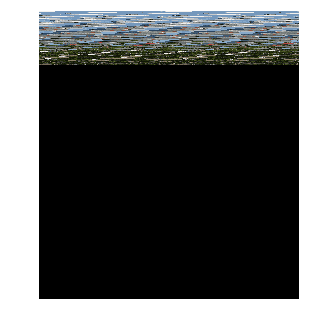

In [134]:
t1 = time.time()
image_g = mpimg.imread('./x3nlgVYICyk.jpg')
data_g = image_g.reshape((image_g.shape[0] * image_g.shape[1], 3))

# params = {'figure.subplot.left': 0.0,
#           'figure.subplot.right': 1.0,
#           'figure.subplot.bottom': 0.0,
#           'figure.subplot.top': 1.0}

# plt.rcParams.update(params)
# fig = plt.figure()
# ax = fig.gca(projection='3d')

# ax.scatter(new_data.T[0], new_data.T[1], new_data.T[2])
# ax.set_zlim(data.min(), data.max())
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.show()
new_image = new_data.reshape((image_g.shape[0], image_g.shape[1], 3)).astype(np.uint8)
ax.scatter(cntrs.T[0], cntrs.T[1], cntrs.T[2])
plt.axis("off")
plt.imshow(new_image)
plt.show()


In [55]:
timeit np.apply_along_axis(np.linalg.norm, 1, centers - np.array([data[0]]*64))

The slowest run took 10.27 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 367 µs per loop


In [56]:
timeit np.sum(np.abs(centers - np.array([data[0]]*64))**2, axis=-1)**(1./2)

The slowest run took 8.27 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25.5 µs per loop


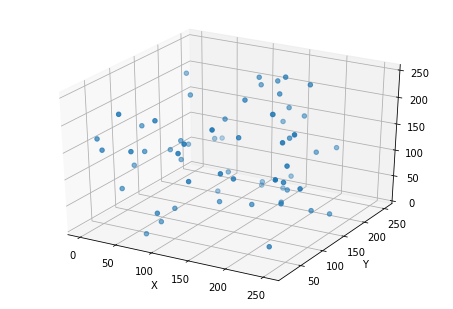

In [121]:
def init_mass_centers(data):
    n_clusters = 64
    data_dim = data.shape[1]
    data_min = data.min(axis=0)
    data_max = data.max(axis=0)
    data_delta = data_max - data_min
    return np.random \
        .random(n_clusters * data_dim) \
        .reshape(n_clusters, data_dim) \
        * data_delta \
        + data_min
        
anis_rand = init_mass_centers(data).astype(int)

params = {'figure.subplot.left': 0.0,
          'figure.subplot.right': 1.0,
          'figure.subplot.bottom': 0.0,
          'figure.subplot.top': 1.0}

plt.rcParams.update(params)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(anis_rand.T[0], anis_rand.T[1], anis_rand.T[2])
ax.set_zlim(data.min(), data.max())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Результат:
* 2 варианта реализации алгоритма KMeans
* Сравнение времени работы п